# Introduction to JupyterLab

## JupyterLab: A Next-Generation Notebook Interface
JupyterLab is the latest web-based interactive development environment for notebooks, code, and data. Its flexible interface allows users to configure and arrange workflows in data science, scientific computing, computational journalism, and machine learning. A modular design invites extensions to expand and enrich functionality.

### Exercise 0: build a jupyter environment on talapas
When you launch the Jupyter interactive app on OnDemand, you can use an alternate conda enviroment. Build one now using the build_jupyter_rt.srun script in racs_training/resources. This will create an environment named 'jupyter_rt'.

### What is Jupyter?
Once upon a time there was a project called interactive python, or iPython. It grew and grew until the developers felt it was too big for python alone. In 2014 Project Jupyter was launched ([the Big Split](https://blog.jupyter.org/the-big-split-9d7b88a031a7)). Project Jupyter (whose name comes from Julia, Python, R) includes JupyterLab, Jupyter Notebook, and JupyterHub.

### JupyterLab
JupyterLab is a highly extensible, feature-rich notebook authoring application and editing environment, and is a part of Project Jupyter, a large umbrella project centered around the goal of providing tools (and standards) for interactive computing with computational notebooks.

A computational notebook is a shareable document that combines computer code, plain language descriptions, data, rich visualizations like 3D models, charts, graphs and figures, and interactive controls. A notebook, along with an editor like JupyterLab, provides a fast interactive environment for prototyping and explaining code, exploring and visualizing data, and sharing ideas with others.
https://jupyterlab.readthedocs.io/en/stable/index.html

### Why use JupyterLab/Notebook?
- interactive code development
- to make interactive notebooks
- to record your workflow (ie, as a lab book)

## The JupyterLab interface
The JupyterLab interface consists of the main workspace, a menu bar, and left and right panels. The main workspace is where you'll see launched applications (notebooks, the editor, terminal, etc). The left panel includes a file browser, a list of running processes, a table of contents (generated from markdown cells), and the extensions manager. The right panel includes the property inspector and debugging tools.

### Workspaces
The file browser directory and open tabs comprise the workspace. When you connect to JupyterLab you begin in the default workspace. The state of the workspace is automatically saved, so you'll see the same open tabs (& kernels? what gets restarted exactly?) from the last time you ran Jupyter. Right-clicking on a workspace name brings up a menu that includes:

* Reset workspace - close all open tabs. Notebooks will be closed, but kernels will not be shut down.
* Clone workspace - make a new workspace based on the current one.
* Create new workspace - make a new empty workspace.

### Kernels
[Kernels are programming language specific processes that run independently and interact with the Jupyter Applications and their user interfaces.](https://docs.jupyter.org/en/stable/projects/kernels.html) Other kernels besides the default ipykernel can be installed, including bash, R, Matlab, and C++.

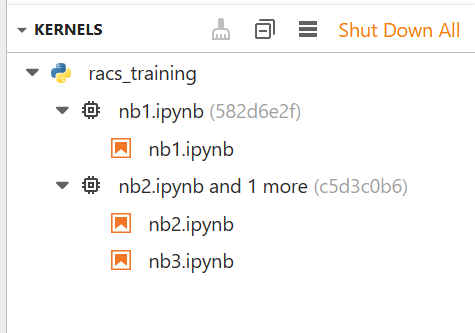

Here we have three notebooks, in two sessions, running one kernel. Notebooks within the same session share variables and functions while the session is active. All sessions with the same kernel share settings including stored variables, bookmarks, and startup scripts. You can right click on the kernel name in the upper corner of a running notebook to change the kernel. This will also stop the kernel for any notebooks in the same session.

#### What happens when you shut down or restart a kernel?
Any variables and functions defined within any associated notebooks or consoles are forgotten. Any running kernels are stopped when your jupyterlab session ends.

### Notebooks
Notebooks let you combine code, markdown, and raw text. Notebooks may or may not run kernels. Jupyter Notebook is an application; you can switch to it by clicking on the word "Notebook" in the upper corner of the current notebook. You can have multiple views into the same notebook - right click on the notebook name and choose "New View for Notebook."

Notebooks are periodically autosaved. You can tell if a notebook has unsaved changed by looking at the tab: an 'x' means no unsaved changes, while a dot means that there are changes that will be lost if you close the notebook. You can save by clicked the "save and create checkpoint" icon. You can revert to the last checkpoint from the "File" menu. Autosaves do not create checkpoints.

#### Notebook modes
When you create a new notebook you'll be in "edit" mode -- hit escape to switch to "command" mode, and enter to switch back. In command mode you can use the "m", "c", and "r" keys to quickly switch the current cell between markdown, code, and raw.

#### Cells
Notebooks consist of cells. There are three types:
- Markdown
- Code
- Raw

This is a **markdown cell**. Markdown cells that start with a header (#) get a little arrow next to them so you can collapse the next cells. They also show up in the table of contents.

After you type something into a cell, hit the "play" button or shift-enter to run it.

Code cells run any code within the cell, and show stdout and stderr beneath the cell. If the code cell returns a value, it will be shown as an output cell.

In [1]:
## this is a code cell
'Hello ' + 'World'

'Hello World'

In [2]:
print('Hello World')

Hello World


#### Variables and Functions
Variables and functions defined in a cell are accessible anywhere in the rest of the notebook.

In [3]:
hw = 'Hello ' + 'World'
print(hw)

Hello World


In [4]:
hw

'Hello World'

In [5]:
def hello(input):
    print('Hello ' + input)

In [6]:
hello('World')

Hello World


In [7]:
def goodbye(input):
    return 'Goodbye ' + input

In [8]:
goodbye('World')

'Goodbye World'

In [9]:
gw = goodbye('World')

In [10]:
gw

'Goodbye World'

## In & Out
See those numbers? 
There are two special containers called "In" and "Out". All code cells go into the "In" container. All output cells go into the "Out" container. Those containers are saved during the current session, no matter how many times you re-execute a code cell.

In [11]:
In

['',
 "## this is a code cell\n'Hello ' + 'World'",
 "print('Hello World')",
 "hw = 'Hello ' + 'World'\nprint(hw)",
 'hw',
 "def hello(input):\n    print('Hello ' + input)",
 "hello('World')",
 "def goodbye(input):\n    return 'Goodbye ' + input",
 "goodbye('World')",
 "gw = goodbye('World')",
 'gw',
 'In']

In [12]:
Out

{1: 'Hello World',
 4: 'Hello World',
 8: 'Goodbye World',
 10: 'Goodbye World',
 11: ['',
  "## this is a code cell\n'Hello ' + 'World'",
  "print('Hello World')",
  "hw = 'Hello ' + 'World'\nprint(hw)",
  'hw',
  "def hello(input):\n    print('Hello ' + input)",
  "hello('World')",
  "def goodbye(input):\n    return 'Goodbye ' + input",
  "goodbye('World')",
  "gw = goodbye('World')",
  'gw',
  'In',
  'Out']}

### Consoles
You can also launch [code consoles](https://jupyterlab.readthedocs.io/en/stable/user/code_console.html) from the Launcher menu. Consoles in the same kernel session as notebooks share variables and functions. If you turn on "Show All Kernel Activity" (right click on console) it will act as a log of all kernel activity.

### Other
The 'other' category in the launcher screen includes the terminal, the text editor, and contextual help. "Create a new xxx file" options all launch the editor with a specific extension and syntax highlighting (you can change the syntax highlighting in the "View" menu).

### Exercise 1
Start a JupyterLab instance on OnDemand, using the conda environment you created in a previous class. Launch a terminal, a text editor, and a notebook.

Inside the notebook, create at least one raw cell, markdown cell, and code cell. Run each cell.

Inspect the In and Out containers. Edit a code cell and rerun it. Inspect the In and Out containers again.

Rename and save your notebook. Open it with the text editor. What kind of file is it?  Open it with the json viewer (right click -> open with).

## Features of the iPython kernel

#### Getting help

You can get help for any function by adding a '?' to the end (this is kernel dependant and may not be true if you aren't using ipykernel). This outputs the signature and docstring of the function to stdout. A double ?? will in most cases print the source code for the function (this is the same information you'll see in the contextual help window). 

A variable name followed by a '?' will show you the type and value of the variable and the docstring for the variable type.

In [13]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [14]:
hello?

Signature: hello(input)
Docstring: <no docstring>
File:      /tmp/ipykernel_675067/3580921801.py
Type:      function

In [15]:
hello??

Signature: hello(input)
Docstring: <no docstring>
Source:   
def hello(input):
    print('Hello ' + input)
File:      /tmp/ipykernel_675067/3580921801.py
Type:      function

In [16]:
hw?

Type:        str
String form: Hello World
Length:      11
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to 'utf-8'.
errors defaults to 'strict'.

### Running system commands
You can run a system command by prefacing it with an exclamation point. 

In [17]:
!ls

Exercise0.md		customizing_ipython.ipynb  logs
Untitled.ipynb		greta.png		   mynotebook.log
advanced_ipython.ipynb	jupyter_intro.ipynb	   stickleback.jpg
build_jupyter_rt.srun	jupyter_rt.yml		   sub-G16_T1w.json
confounds.tsv		jupyterlabbook.ipynb	   sub-G16_T1w.nii


You can capture the output by either assigning the result to a variable, or using a double exclamation point.

In [18]:
!!ls

['Exercise0.md',
 'Untitled.ipynb',
 'advanced_ipython.ipynb',
 'build_jupyter_rt.srun',
 'confounds.tsv',
 'customizing_ipython.ipynb',
 'greta.png',
 'jupyter_intro.ipynb',
 'jupyter_rt.yml',
 'jupyterlabbook.ipynb',
 'logs',
 'mynotebook.log',
 'stickleback.jpg',
 'sub-G16_T1w.json',
 'sub-G16_T1w.nii']

Let's capture the output out of `!ls` (the list of files in the current working directory) and assign it to the variable `myfiles`.

In [19]:
myfiles = !ls

In [20]:
myfiles

['Exercise0.md',
 'Untitled.ipynb',
 'advanced_ipython.ipynb',
 'build_jupyter_rt.srun',
 'confounds.tsv',
 'customizing_ipython.ipynb',
 'greta.png',
 'jupyter_intro.ipynb',
 'jupyter_rt.yml',
 'jupyterlabbook.ipynb',
 'logs',
 'mynotebook.log',
 'stickleback.jpg',
 'sub-G16_T1w.json',
 'sub-G16_T1w.nii']

## iPython SLists

The list returned by a shell command in an ipykernel notebook is a special kind of list. It might **appear** like an ordinary list when evaluated in a Jupyter cell, but it actual has component parts:
    * *slist_name*.l
    * *slist_name*.n
    * *slist_name*.s
    * *slist_name*.p

Let's use the `?` magic to get in-notebook documentation for `Slist`.

In [21]:
myfiles?

Type:        SList
String form: ['Exercise0.md', 'Untitled.ipynb', 'advanced_ipython.ipynb', 'build_jupyter_rt.srun', 'confounds. <...> bbook.ipynb', 'logs', 'mynotebook.log', 'stickleback.jpg', 'sub-G16_T1w.json', 'sub-G16_T1w.nii']
Length:      15
File:        ~/.conda/envs/jupyter_rt/lib/python3.13/site-packages/IPython/utils/text.py
Docstring:  
List derivative with a special access attributes.

These are normal lists, but with the special attributes:

* .l (or .list) : value as list (the list itself).
* .n (or .nlstr): value as a string, joined on newlines.
* .s (or .spstr): value as a string, joined on spaces.
* .p (or .paths): list of path objects (requires path.py package)

Any values which require transformations are computed only once and
cached.

Let's grab the file list as a new-line separated string with `.n`.

In [22]:
myfiles.n

'Exercise0.md\nUntitled.ipynb\nadvanced_ipython.ipynb\nbuild_jupyter_rt.srun\nconfounds.tsv\ncustomizing_ipython.ipynb\ngreta.png\njupyter_intro.ipynb\njupyter_rt.yml\njupyterlabbook.ipynb\nlogs\nmynotebook.log\nstickleback.jpg\nsub-G16_T1w.json\nsub-G16_T1w.nii'

In [23]:
print(myfiles.n)

Exercise0.md
Untitled.ipynb
advanced_ipython.ipynb
build_jupyter_rt.srun
confounds.tsv
customizing_ipython.ipynb
greta.png
jupyter_intro.ipynb
jupyter_rt.yml
jupyterlabbook.ipynb
logs
mynotebook.log
stickleback.jpg
sub-G16_T1w.json
sub-G16_T1w.nii


And as a space-separated string with `.s`

In [24]:
myfiles.s

'Exercise0.md Untitled.ipynb advanced_ipython.ipynb build_jupyter_rt.srun confounds.tsv customizing_ipython.ipynb greta.png jupyter_intro.ipynb jupyter_rt.yml jupyterlabbook.ipynb logs mynotebook.log stickleback.jpg sub-G16_T1w.json sub-G16_T1w.nii'

## Passing python variables as arguments to system commands.
You can pass a python variable as an argument either by adding a dollar sign or by enclosing the variable name in curly braces.

In [25]:
resources = '/projects/racs_training/resources'

In [26]:
!ls {resources}

bids_RR  fmriprep_out	   jupyter_examples	 slurm_examples       talapas
dcm	 fmriprep_scripts  jupyter_examples_jcs  slurm_examples_day2  temp


#### Exercise two: bash commands
I ran an array job with id 25921686. Did it work?

Create an integer variable: `jobid`. Use the `sacct` command to find the status.

In [34]:
jobid = 25921686
!sacct -j {jobid}

JobID           JobName  Partition    Account  AllocCPUS      State ExitCode 
------------ ---------- ---------- ---------- ---------- ---------- -------- 
25921686_0   fmriprep_+    compute       lcni          8  COMPLETED      0:0 
25921686_0.+      batch                  lcni          8  COMPLETED      0:0 
25921686_0.+     extern                  lcni          8  COMPLETED      0:0 
25921686_1   fmriprep_+    compute       lcni          8  COMPLETED      0:0 
25921686_1.+      batch                  lcni          8  COMPLETED      0:0 
25921686_1.+     extern                  lcni          8  COMPLETED      0:0 
25921686_2   fmriprep_+    compute       lcni          8  COMPLETED      0:0 
25921686_2.+      batch                  lcni          8  COMPLETED      0:0 
25921686_2.+     extern                  lcni          8  COMPLETED      0:0 
25921686_3   fmriprep_+    compute       lcni          8     FAILED      1:0 
25921686_3.+      batch                  lcni          8     FAI

This array job had a few failures, let's isolate them.

Use `grep` to find the results that failed.

In [35]:
failed = !sacct -j {jobid} | grep FAILED 

In [38]:
failed

['25921686_3   fmriprep_+    compute       lcni          8     FAILED      1:0 ',
 '25921686_3.+      batch                  lcni          8     FAILED      1:0 ',
 '25921686_46  fmriprep_+    compute       lcni          8     FAILED      1:0 ',
 '25921686_46+      batch                  lcni          8     FAILED      1:0 ']

Now, process this list into something more readable with [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

In [39]:
[x for x in failed] # Iterate over each item in a list and do the same thing

['25921686_3   fmriprep_+    compute       lcni          8     FAILED      1:0 ',
 '25921686_3.+      batch                  lcni          8     FAILED      1:0 ',
 '25921686_46  fmriprep_+    compute       lcni          8     FAILED      1:0 ',
 '25921686_46+      batch                  lcni          8     FAILED      1:0 ']

In [40]:
[x for x in failed if "compute" in x]

['25921686_3   fmriprep_+    compute       lcni          8     FAILED      1:0 ',
 '25921686_46  fmriprep_+    compute       lcni          8     FAILED      1:0 ']

In [41]:
[x.split() for x in failed if "compute" in x]

[['25921686_3', 'fmriprep_+', 'compute', 'lcni', '8', 'FAILED', '1:0'],
 ['25921686_46', 'fmriprep_+', 'compute', 'lcni', '8', 'FAILED', '1:0']]

In [42]:
jobids = [x.split()[0] for x in failed if "compute" in x]

In [ ]:
Now, you can check the `seff` status of each of the two failed job ids.

In [43]:
!seff {jobids[0]}

Job ID: 25921691
Array Job ID: 25921686_3
Cluster: talapas
User/Group: jolinda/uoregon
State: FAILED (exit code 1)
Nodes: 1
Cores per node: 8
CPU Utilized: 1-02:58:23
CPU Efficiency: 49.64% of 2-06:20:24 core-walltime
Job Wall-clock time: 06:47:33
Memory Utilized: 6.60 GB
Memory Efficiency: 20.62% of 32.00 GB


In [44]:
!seff {jobids[1]}

Job ID: 25921686
Array Job ID: 25921686_46
Cluster: talapas
User/Group: jolinda/uoregon
State: FAILED (exit code 1)
Nodes: 1
Cores per node: 8
CPU Utilized: 00:00:38
CPU Efficiency: 0.17% of 06:14:08 core-walltime
Job Wall-clock time: 00:46:46
Memory Utilized: 495.25 MB
Memory Efficiency: 1.51% of 32.00 GB


## Magics
Jupyter notebooks have [special commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) called "cell magics" and "line magics". Cell magics start with %%, and line magics start with %. You can get help for magics by adding a '?' at the end.

In [45]:
%logstart?

Docstring:
Start logging anywhere in a session.

%logstart [-o|-r|-t|-q] [log_name [log_mode]]

If no name is given, it defaults to a file named 'ipython_log.py' in your
current directory, in 'rotate' mode (see below).

'%logstart name' saves to file 'name' in 'backup' mode.  It saves your
history up to that point and then continues logging.

%logstart takes a second optional parameter: logging mode. This can be one
of (note that the modes are given unquoted):

append
    Keep logging at the end of any existing file.

backup
    Rename any existing file to name~ and start name.

global
    Append to  a single logfile in your home directory.

over
    Overwrite any existing log.

rotate
    Create rotating logs: name.1~, name.2~, etc.

Options:

  -o
    log also IPython's output. In this mode, all commands which
    generate an Out[NN] prompt are recorded to the logfile, right after
    their corresponding input line. The output lines are always
    prepended with a '#[Out]# ' marker, 

In [46]:
%logstart -t -o mynotebook.log append

Activating auto-logging. Current session state plus future input saved.
Filename       : mynotebook.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [ ]:
%logstop

### Cell magics
Cell magics start with %% and apply to everything in the cell.

In [51]:
slurm_examples = "/projects/racs_training/slurm_examples"

In [ ]:
%%bash?

In [ ]:
%%bash
for x in *.ipynb
    do echo $x
done

To pass one or more python variables to a bash cell, use -s

In [52]:
%%bash -s {slurm_examples}
for x in $1/*.sbatch
    do echo $x
done

/projects/racs_training/slurm_examples/gpu.sbatch
hprojects/racs_training/slurm_examples/hello.sbatc
/projects/racs_training/slurm_examples/long.sbatch


You can load lmod modules within a Slurm cell.

In [33]:
%%bash
module purge
module load fsl/6.0.7.9
fslcc

sh: module-logger: command not found
sh: module-logger: command not found

Part of FSL (ID: "")
fslcc: Cross-correlate two time-series, timepoint by timepoint

Usage: 
[options] <first_input> <second_input> 

of):onal arguments (You may optionally specify one or more 
	-m	mask file name 
	--noabs		Don't return absolute values (keep sign)
 the input filest demean
	-t		Threshhold ( default 0.1 )
( default 2 )f decimal places to display in output 




CalledProcessError: Command 'b'module purge\nmodule load fsl/6.0.7.9\nfslcc\n'' returned non-zero exit status 1.

Because fslcc returns an error code if you don't provide an argument, it throws a python error as well. If you want to ignore those types of errors, use --no-raise-error

In [ ]:
%%bash --no-raise-error
module purge
module load fsl/6.0.7.9
fslcc

We can use the %%capture cell magic to capture stdin and stdout from a bash cell. 

In [54]:
%%capture output 
%%bash --no-raise-error -s {slurm_examples}
ls $1
ls banana

In [48]:
output

In [55]:
output?

Signature:      output()
Type:           CapturedIO
String form:   
gpu.sbatch
           hello.py
           hello.sbatch
           hello_world_python-31471316.err
           hello_world_python-31471316.out
           <...> 54.err
           long_hello_world-31468454.out
           long_hello_world-31471363.err
           long_hello_world-31471363.out
           
File:           ~/.conda/envs/jupyter_rt/lib/python3.13/site-packages/IPython/utils/capture.py
Docstring:     
Simple object for containing captured stdout/err and rich display StringIO objects

Each instance `c` has three attributes:

- ``c.stdout`` : standard output as a string
- ``c.stderr`` : standard error as a string
- ``c.outputs``: a list of rich display outputs

Additionally, there's a ``c.show()`` method which will print all of the
above in the same order, and can be invoked simply via ``c()``.
Call docstring: write my output to sys.stdout/err as appropriate

In [56]:
output()

gpu.sbatch
hello.py
hello.sbatch
hello_world_python-31471316.err
hello_world_python-31471316.out
hello_world_python-31471343.err
hello_world_python-31471343.out
long.sbatch
long_hello_world-31468454.err
long_hello_world-31468454.out
long_hello_world-31471363.err
long_hello_world-31471363.out


ls: cannot access 'banana': No such file or directory


The contents of the `slurm_examples` directory will captured by stdout

In [ ]:
output.stdout

The failure to `ls` banana will be redirected to stderr

In [ ]:
output.stderr

Use the `%%writefile` cell magic to write outputs to file.

In [62]:
%%writefile test.txt
"my sentence"

Writing test.txt


In [63]:
!cat test.txt

"my sentence"


You can also load and edit text files from within inside Jupyter using `%load`.

### Exercise 2: Logging
Turn logging on in your current notebook. Open the log in the text editor and inspect the contents. Which lines are logged? Do they all have timestamps? Edit and rerun some cells. How is this reflected in the logger? How is this different from what will be saved in the notebook itself?

### More magics

In [67]:
%automagic off


Automagic is OFF, % prefix IS needed for line magics.


The `%who` cell magic prints active variables. Think of it like the sidebar in RStudio.

In [68]:
%who

failed	 goodbye	 gw	 hello	 hw	 jobid	 jobids	 myfiles	 output	 
resources	 slurm_examples	 


`%whos` prints the *value* of each variable.

In [69]:
%whos

Variable         Type          Data/Info
----------------------------------------
failed           SList         ['25921686_3   fmriprep_+<...> 8     FAILED      1:0 ']
goodbye          function      <function goodbye at 0x14e3f37bc400>
gw               str           Goodbye World
hello            function      <function hello at 0x14e3f37be2a0>
hw               str           Hello World
jobid            int           25921686
jobids           list          n=2
myfiles          SList         ['Exercise0.md', 'Untitle<...>json', 'sub-G16_T1w.nii']
output           CapturedIO    gpu.sbatch\nhello.py\nhel<...>ello_world-31471363.out\n
resources        str           /projects/racs_training/resources
slurm_examples   str           /projects/racs_training/slurm_examples


Use `del` to delete a variable and free up memory.

In [ ]:
del gw

You can see the `gw` variable is no longer present.

In [71]:
%who

failed	 goodbye	 gw	 hello	 hw	 jobid	 jobids	 myfiles	 output	 
resources	 slurm_examples	 


`pwd` prints the current working directory.

In [72]:
%pwd

'/gpfs/home/emwin/jupyter_examples'

You can't change the working directory of a Jupyter notebook in a Bash line magic. 

In [73]:
!cd ~/slurm_examples

In [74]:
%pwd

'/gpfs/home/emwin/jupyter_examples'

Instead you must use the `%cd` cell magic.

In [76]:
!mkdir my_subdir

In [77]:
%cd my_subdir

/gpfs/home/emwin/jupyter_examples/my_subdir


In [78]:
%pwd

'/gpfs/home/emwin/jupyter_examples/my_subdir'

You can pass the return value of cell magics to Python variables.

In [79]:
slurm_examples = %pwd

In [80]:
print(slurm_examples)

/gpfs/home/emwin/jupyter_examples/my_subdir


The `%dhist` cell magic lists the history of working directories in Jupyter.

In [81]:
%dhist

Directory history (kept in _dh)
0: /gpfs/home/emwin/jupyter_examples
1: /gpfs/home/emwin/jupyter_examples/my_subdir


This navigates you to your initial working directory.

In [82]:
%cd -0

/gpfs/home/emwin/jupyter_examples


This cell magic lists available aliases.

In [83]:
%alias

Total number of aliases: 12


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -o --color %l | grep /$'),
 ('lf', 'ls -F -o --color %l | grep ^-'),
 ('lk', 'ls -F -o --color %l | grep ^l'),
 ('ll', 'ls -F -o --color'),
 ('ls', 'ls -F --color'),
 ('lx', 'ls -F -o --color %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir')]

In [86]:
slurm_examples = "/projects/racs_training/resources/slurm_examples"

In [87]:
!ls {slurm_examples}

gpu.sbatch  hello.sbatch  long.sbatch


In [88]:
%ls {slurm_examples}

gpu.sbatch*  hello.sbatch*  long.sbatch*


This creates a cell magic alias for the Bash command `tail`.

In [90]:
%alias tail tail

In [91]:
%tail {slurm_examples}/long.sbatch

#SBATCH --ntasks-per-node=1              ### Number of tasks to be launched per Node
#SBATCH --cpus-per-task=1                ### Number of cpus/cores to be launched per Task


### Run your actual program
for i in {1..100}
do
    echo "This is loop iteration $i"
    sleep 45
done


This alias will only last for this session. In order to save it, use the %store magic

In [92]:
%store tail

Alias stored: tail (tail)


You can also store variables, but not functions.

In [93]:
%store hw

Stored 'hw' (str)


In [94]:
%store

Stored variables and their in-db values:
hw             -> 'Hello World'


Stored variables are not loaded until you store -r them.

In [95]:
mystring = "example"

In [96]:
%store -r

In [97]:
mystring

'example'

Use `%store -d` to remove variables from storage.

In [99]:
%store -d hw

In [100]:
%store

Stored variables and their in-db values:


You can't remove aliases from the store with -d, use %unalias instead

In [101]:
%unalias tail

Removing %stored alias tail


In [104]:
%cat {slurm_examples}/hello.sbatch

#!/bin/bash

#SBATCH --partition=compute              ### Partition (like a queue in PBS)
#SBATCH --account=racs_training          ### Account used for job submission

### NOTE: %u=userID, %x=jobName, %N=nodeID, %j=jobID, %A=arrayMain, %a=arraySub
#SBATCH --job-name=hello_world_python    ### Job Name
#SBATCH --output=%x-%j.out               ### File in which to store job output
#SBATCH --error=%x-%j.err                ### File in which to store job error messages

#SBATCH --time=0-00:05:00                ### Wall clock time limit in Days-HH:MM:SS
#SBATCH --nodes=1                        ### Number of nodes needed for the job
#SBATCH --mem=500M                       ### Total Memory for job in MB -- can do K/M/G/T for KB/MB/GB/TB
#SBATCH --ntasks-per-node=1              ### Number of tasks to be launched per Node
#SBATCH --cpus-per-task=1                ### Number of cpus/cores to be launched per Task

### Load needed modules
module purge
module load python3/3.11.4
module list

### Run 